In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

df = pd.read_csv("/kaggle/input/datasets/vishardmehta/most-selling-video-games-dataset/best_selling_video_games.csv")

# Business context 

**This dataset ranks the best-selling video games globally.**

We aim to understand:
- Which platforms dominate?
- Which publishers drive revenue?
- How sales evolved across release periods?


In [ ]:
df["Releaseyear"] = df["Releaseyear"].astype(str)
df["Releaseyear"] = df["Releaseyear"].str.extract(r"(\d{4})")
df["Releaseyear"] = pd.to_numeric(df["Releaseyear"], errors="coerce")

df.head()

,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,Multi-platform,Mojang Studios,Mojang Studios,NaN,2011.0,350,Minecraft,1
1,2,Grand Theft Auto V,Multi-platform,Rockstar North,Rockstar Games,NaN,2013.0,225,Grand Theft Auto,1
2,3,Wii Sports[a],Wii,Nintendo EAD,Nintendo,NaN,2006.0,82.9,Wii,1
3,4,Red Dead Redemption 2,Multi-platform,Rockstar Games,Rockstar Games,NaN,2018.0,82,Red Dead,1
4,5,Mario Kart 8/Deluxe,Wii U/Switch,Nintendo EAD/Nintendo EPD(Deluxe),Nintendo,[c],2014.0,79.05,Mario Kart,1


## q1] which platform has highest total sales

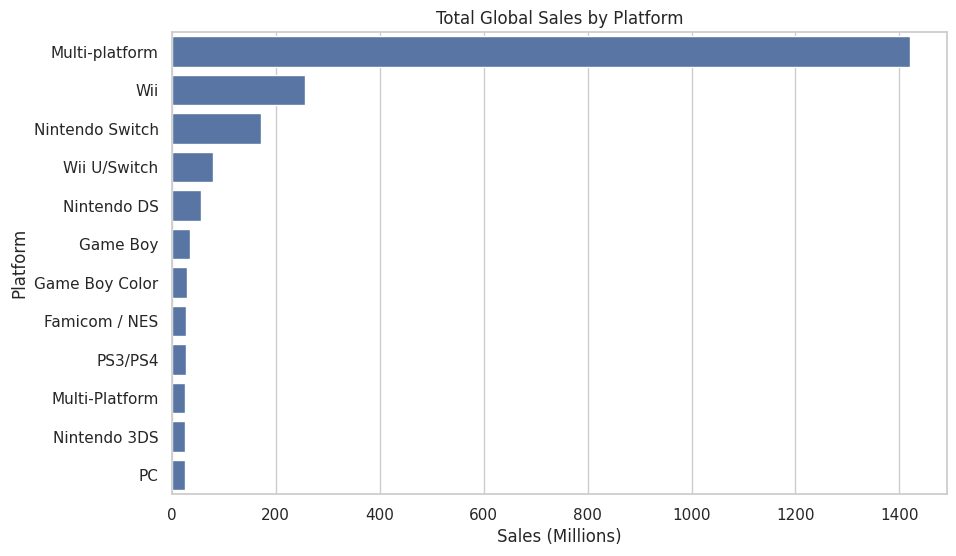

In [ ]:
# Clean Sales column
df["Sales(millions)"] = pd.to_numeric(
    df["Sales(millions)"],
    errors="coerce"
)

# Optional: drop rows where sales is missing
df = df.dropna(subset=["Sales(millions)"])


platform_sales = (
    df.groupby("Platform(s)")["Sales(millions)"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=platform_sales.values,
    y=platform_sales.index
)

plt.title("Total Global Sales by Platform")
plt.xlabel("Sales (Millions)")
plt.ylabel("Platform")
plt.show()


## q2] top publishers by sales

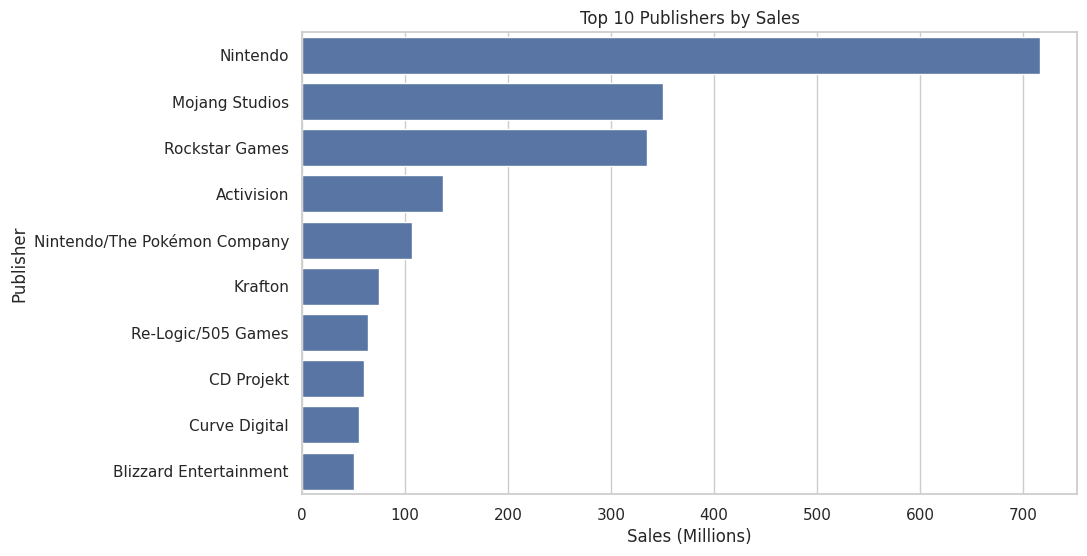

In [ ]:
publisher_sales = (
    df.groupby("Publisher(s)")["Sales(millions)"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=publisher_sales.values,
    y=publisher_sales.index
)

plt.title("Top 10 Publishers by Sales")
plt.xlabel("Sales (Millions)")
plt.ylabel("Publisher")
plt.show()


# Release year segments

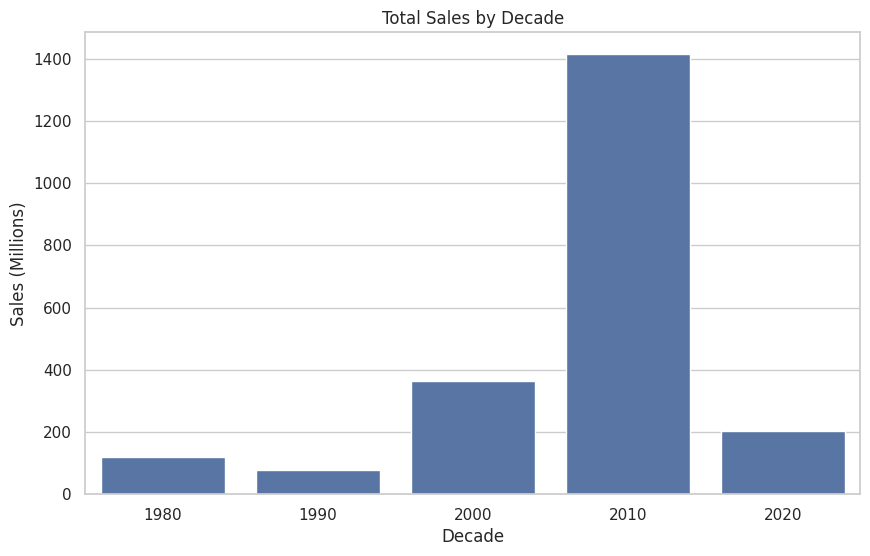

In [ ]:
df["Decade"] = (df["Releaseyear"] // 10) * 10

decade_sales = (
    df.groupby("Decade")["Sales(millions)"]
      .sum()
      .sort_values()
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=decade_sales.index.astype(int),
    y=decade_sales.values
)

plt.title("Total Sales by Decade")
plt.xlabel("Decade")
plt.ylabel("Sales (Millions)")
plt.show()


# Segment comparison

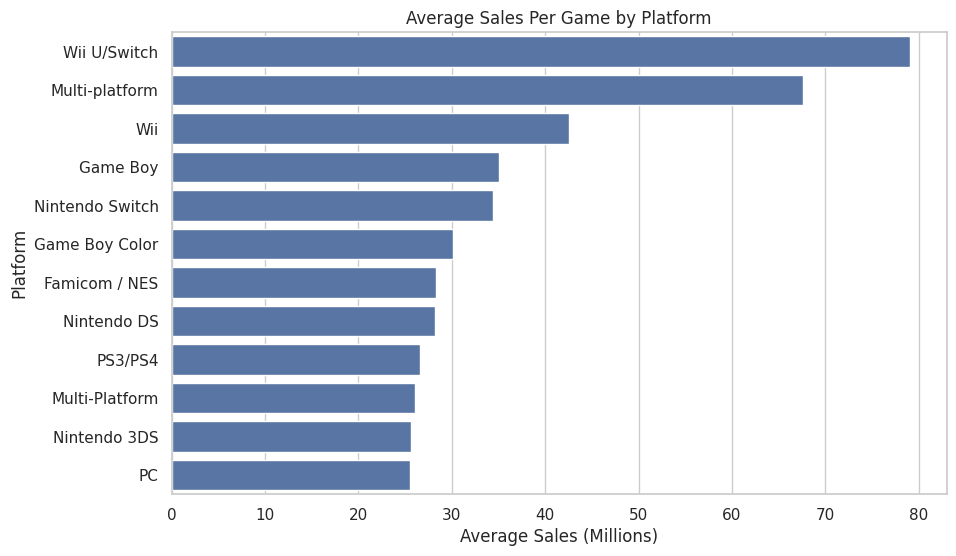

In [ ]:
avg_sales = (
    df.groupby("Platform(s)")["Sales(millions)"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_sales.values,
    y=avg_sales.index
)

plt.title("Average Sales Per Game by Platform")
plt.xlabel("Average Sales (Millions)")
plt.ylabel("Platform")
plt.show()


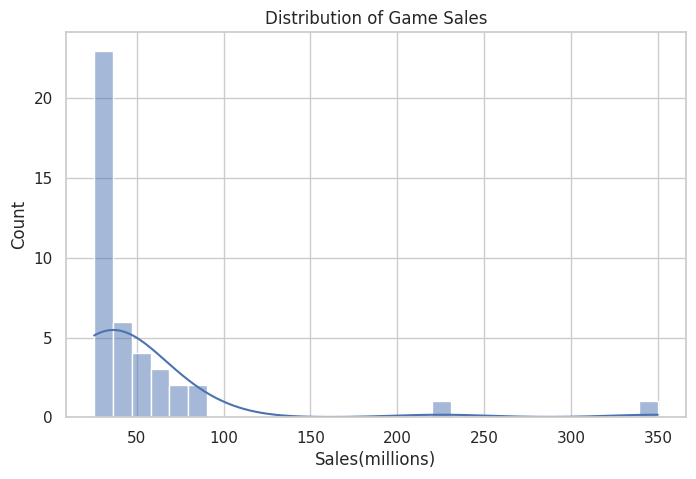

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales(millions)"], bins=30, kde=True)
plt.title("Distribution of Game Sales")
plt.show()
